<Project: Performance Analysis of CNN>

MNIST_MLP.ipynb

인공지능 001분반

21011591 서민정

# IMPORT

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

import sys
import time
import random
import numpy as np

seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
random.seed(seed)
np.random.seed(seed)

In [22]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


# DATA LOAD

In [23]:
train_dataset = dsets.MNIST(root = 'dataset/',
                       train = True,
                       transform = transforms.ToTensor(),
                       download = True)
test_dataset = dsets.MNIST(root = 'dataset/',
                       train = False,
                       transform = transforms.ToTensor(),
                       download = True)

In [24]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [25]:
train_dataset.data = train_dataset.data.reshape(train_dataset.data.shape[0], 784)
test_dataset.data =  test_dataset.data.reshape(test_dataset.data.shape[0], 784)

In [26]:
train_dataset.data.shape

torch.Size([60000, 784])

In [27]:
for i in train_dataset.data[0].numpy():
    print('%3d' %i, end=' ')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0   0   0 

In [28]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# MODEL TRAINING

### MLP 파라미터 수 기준 모델

In [29]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=64, out_features=64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(in_features=64, out_features=64)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(in_features=64, out_features=32)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(in_features=32, out_features=32)
        self.relu5 = nn.ReLU()
        self.fc6 = nn.Linear(in_features=32, out_features=10)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.fc5(x)
        x = self.relu5(x)
        x = self.fc6(x)
        x = self.softmax(x)
        return x

In [30]:
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [31]:
num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    start_time = time.time()

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    train_losses.append(average_loss)

    end_time = time.time()
    elapsed_time = end_time - start_time

    minutes = int(elapsed_time // 60)
    seconds = int(elapsed_time % 60)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}, Time: {minutes}m {seconds}s')

Epoch [1/10], Loss: 1.7985, Time: 0m 9s
Epoch [2/10], Loss: 1.6409, Time: 0m 9s
Epoch [3/10], Loss: 1.6104, Time: 0m 8s
Epoch [4/10], Loss: 1.5472, Time: 0m 9s
Epoch [5/10], Loss: 1.5237, Time: 0m 10s
Epoch [6/10], Loss: 1.5142, Time: 0m 9s
Epoch [7/10], Loss: 1.5100, Time: 0m 8s
Epoch [8/10], Loss: 1.5060, Time: 0m 9s
Epoch [9/10], Loss: 1.5037, Time: 0m 9s
Epoch [10/10], Loss: 1.5003, Time: 0m 8s


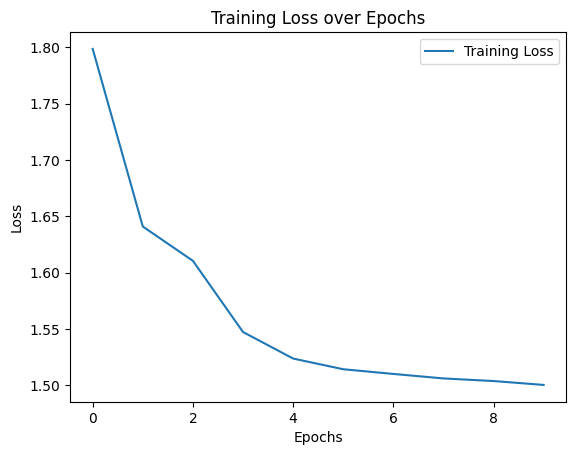

In [32]:
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [33]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 95.78%


In [34]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 95.20%


### MLP 정확도 기준 모델

In [35]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=512, out_features=10)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [36]:
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [37]:
num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    start_time = time.time()

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    train_losses.append(average_loss)

    end_time = time.time()
    elapsed_time = end_time - start_time

    minutes = int(elapsed_time // 60)
    seconds = int(elapsed_time % 60)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}, Time: {minutes}m {seconds}s')

Epoch [1/10], Loss: 1.5727, Time: 0m 8s
Epoch [2/10], Loss: 1.5124, Time: 0m 7s
Epoch [3/10], Loss: 1.4981, Time: 0m 8s
Epoch [4/10], Loss: 1.4903, Time: 0m 8s
Epoch [5/10], Loss: 1.4849, Time: 0m 8s
Epoch [6/10], Loss: 1.4806, Time: 0m 8s
Epoch [7/10], Loss: 1.4783, Time: 0m 7s
Epoch [8/10], Loss: 1.4760, Time: 0m 8s
Epoch [9/10], Loss: 1.4746, Time: 0m 9s
Epoch [10/10], Loss: 1.4732, Time: 0m 7s


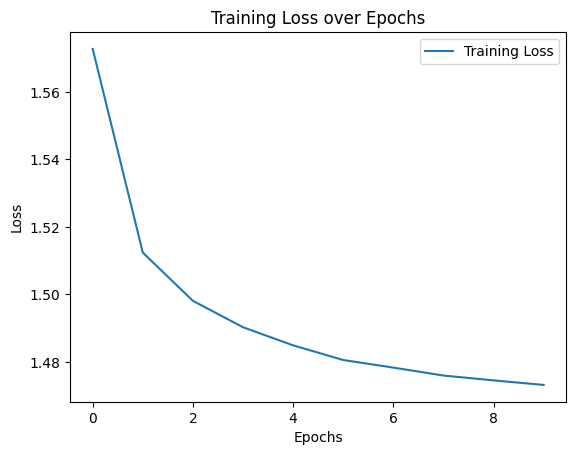

In [38]:
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [39]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 98.79%


In [40]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 97.44%
